In [1]:
import ROOT as r

Welcome to JupyROOT 6.14/09


***
In this tutorial we shall build a signal and a background model to fit a di-electron invariant mass distribution. The signal model is a BreitWigner convoluted with crystal ball. The background is modelled as an exponential distrinution.
***

In [2]:
m = r.RooRealVar("m","e^{+} e^{-} Inv. Mass (in GeV)",75,120,"GeV")

In [3]:
inputfile = r.TFile("MyAn_data_SingleElectron.root","READ")
inputfile.ls()

TFile**		MyAn_data_SingleElectron.root	
 TFile*		MyAn_data_SingleElectron.root	
  KEY: TH1F	h1;1	invariant mass plot


In [4]:
heg = inputfile.Get("h1")

In [5]:
dh = r.RooDataHist("dh","dh",r.RooArgList(m),r.RooFit.Import(heg))

[#1] INFO:DataHandling -- RooDataHist::adjustBinning(dh): fit range of variable m expanded to nearest bin boundaries: [75,120] --> [75,120]


In [6]:
frame = m.frame(r.RooFit.Title("M_{e^{+} e^{-}}"))
dh.plotOn(frame,r.RooFit.Name("dh"))

<ROOT.RooPlot object ("frame_m_6e6aef0") at 0x6e6aef0>

In [33]:
mBW = r.RooRealVar("mBW","mean BW",91.1875,60,120)                                                              
sBW = r.RooRealVar("sBW","sigma BW",2.4952,0.0,10.0)                                                            
brietwigner = r.RooBreitWigner("BW","BW",m,mBW,sBW)                                                             
                                                                                                                
mCB = r.RooRealVar("mCB", "mCB" ,0.1,0,1.0)                                                                       
sCB = r.RooRealVar("sCB", "sCB" ,2.3 , 0.0, 5.0)                                                               
nCB = r.RooRealVar("nCB","nCB", 1,0.,5.0)                                                                        
#RooRealVar nCB("nCB","", 1.42,0.001,50)                                                                    
alphaCB = r.RooRealVar("alphaCB","", 0.93,0.1,5.0)                                                               
#RooRealVar alphaCB("alphaCB","", 0.93,0.1 , 50)                                                            
cball = r.RooCBShape("cball","cball",m,mCB,sCB, alphaCB, nCB)


bwcball = r.RooFFTConvPdf("BWxcball","BW(X)cball",m,brietwigner, cball)

In [34]:
lambd = r.RooRealVar("lambd", "slope", -0.1, -5.0, 0.0)                                                        
bkgshape = r.RooExponential("expo", "exponential PDF", m, lambd)                                                   

In [35]:
nsig = r.RooRealVar("nsig","signal events",50000,0,8000000);                                                      
nbkg = r.RooRealVar("nbkg","signal background events",1000,0,2000000);                                            
                                                                                                                
model = r.RooAddPdf("model","bwcball+shape",r.RooArgList(bwcball,bkgshape),r.RooArgList(nsig,nbkg)) ;                   

In [36]:
model.fitTo(dh,r.RooFit.Extended(),r.RooFit.Range(75,120))

<ROOT.RooFitResult object at 0x(nil)>

[#1] INFO:Fitting -- RooAbsOptTestStatistic::ctor(nll_model_dh) constructing test statistic for sub-range named fit
[#1] INFO:Fitting -- RooAbsOptTestStatistic::ctor(nll_model_dh) fixing interpretation of coefficients of any RooAddPdf to full domain of observables 
[#1] INFO:Caching -- RooAbsCachedPdf::getCache(BWxcball) creating new cache 0x618e710 with pdf BW_CONV_cball_CACHE_Obs[m] for nset (m) with code 0
[#1] INFO:Minization -- RooMinimizer::optimizeConst: activating const optimization
[#1] INFO:Caching -- RooAbsCachedPdf::getCache(BWxcball) creating new cache 0x7377470 with pdf BW_CONV_cball_CACHE_Obs[m] for nset (m) with code 0 from preexisting content.
[#1] INFO:Minization --  The following expressions will be evaluated in cache-and-track mode: (BWxcball,expo)
 **********
 **   19 **SET PRINT           1
 **********
 **********
 **   20 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 alphaCB      9.30000e-01  4.150

[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) p.d.f was fitted in range and no explicit plot,norm range was specified, using fit range as default
[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) only plotting range 'fit_nll_model_dh'
[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) p.d.f. curve is normalized using explicit choice of ranges 'fit_nll_model_dh'
[#1] INFO:Caching -- RooAbsCachedPdf::getCache(BWxcball) creating new cache 0x618d170 with pdf BW_CONV_cball_CACHE_Obs[m] for nset (m) with code 0
[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) p.d.f was fitted in range and no explicit plot,norm range was specified, using fit range as default
[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) only plotting range 'fit_nll_model_dh'
[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) p.d.f. curve is normalized using explicit choice of ranges 'fit_nll_model_dh'
[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) directly selected PDF components: (expo)
[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) in

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


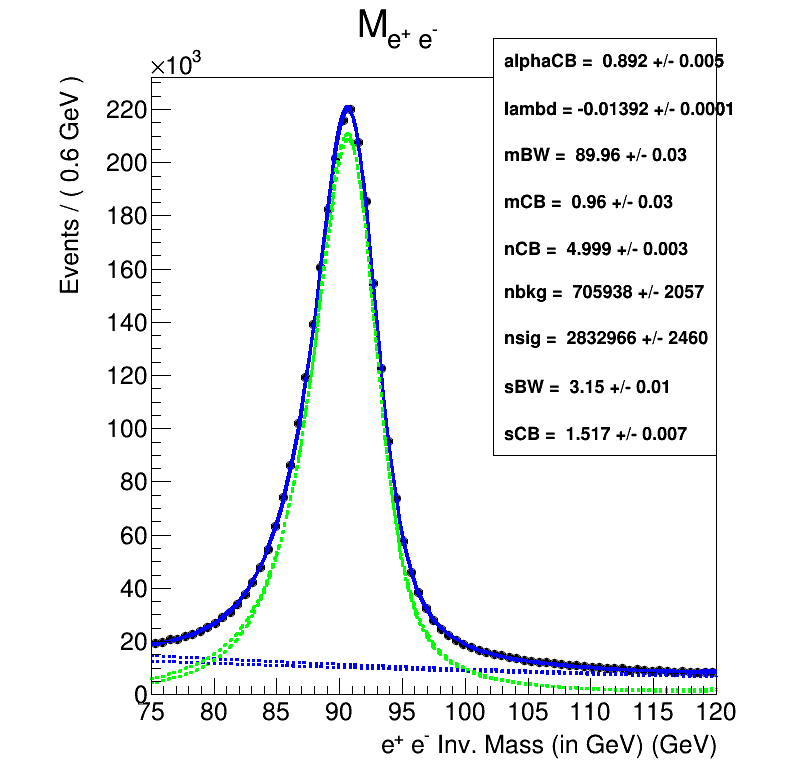

In [37]:
ras_bkgshape = r.RooArgSet(bkgshape)
ras_bwcball = r.RooArgSet(bwcball)
model.plotOn(frame,r.RooFit.Name("model"));                                                                            
model.plotOn(frame,r.RooFit.Components(ras_bkgshape),r.RooFit.LineStyle(r.kDashed)) ;                                                    
model.plotOn(frame,r.RooFit.Components(ras_bwcball),r.RooFit.LineColor(r.kGreen),r.RooFit.LineStyle(r.kDashed)) ;                                
model.paramOn(frame,r.RooFit.Layout(0.62,0.90),r.RooFit.Format("NEU",r.RooFit.AutoPrecision(1))) ;                                       
frame.getAttText().SetTextSize(0.026) ;                                                                     
                                                                                                                
c = r.TCanvas("c","Inv. Mass Hist.",800,800) ;                                                     
c.cd();                                                                                                      
r.gPad.SetLeftMargin(0.19) ; frame.GetYaxis().SetTitleOffset(1.8) ;                                          
r.gPad.SetRightMargin(0.10) ; frame.GetXaxis().SetTitleOffset(1.2) ;                                         
                                                                                                                
frame.Draw();                                                                                                
c.Draw()                                                                                                                                                                                    

('The chi2/ndof = ', 16.211195624204912)
[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) p.d.f was fitted in range and no explicit plot,norm range was specified, using fit range as default
[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) only plotting range 'fit_nll_model_dh'
[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) p.d.f. curve is normalized using explicit choice of ranges 'fit_nll_model_dh'
[#1] INFO:Caching -- RooAbsCachedPdf::getCache(BWxcball) creating new cache 0x77f33f0 with pdf BW_CONV_cball_CACHE_Obs[m] for nset (m) with code 0 from preexisting content.
